<center><H1>Auto Data Set</H1></center><br><br>
<center><img src="https://img.freepik.com/premium-vector/set-futuristic-car-service-scanning-auto-data-analysis-intelligent-car-banner_74231-1065.jpg?w=1800" width="400px" height="400px"></center>


 <center> <H3> In association with An Introduction to Statistical Learning: With Applications in R (ISLR V 2)  </H3></center>
  <center> <H4 style="color:blue;">  Answer for Applied <b>Question 09 of Chapter 03</b> </H4></center>


<H3> About the Data Set </H3><br>

**Description**
Gas mileage, horsepower, and other information for 392 vehicles.

**Usage**
Auto

**Format**
A data frame with **392 observations** on the following 9 variables.

1. mpg: miles per gallon
2. cylinders: Number of cylinders between 4 and 8
3. displacement: Engine displacement (cu. inches)
4. horsepower: Engine horsepower
5. weight: Vehicle weight (lbs.)
6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
7. year: Model year (modulo 100)
8. origin: Origin of car (1. American, 2. European, 3. Japanese)
9. name: Vehicle name

**Source**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**References**
James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, https://www.statlearning.com, Springer-Verlag, New York


In [1]:
# load data set
Auto = read.csv("/kaggle/input/autompg-dataset/auto-mpg.csv", header=TRUE, na.strings='?',stringsAsFactors = T)
dim(Auto)

[1] 398   9

In [ ]:
# omit nulls
Auto <- na.omit(Auto)
dim(Auto)

In [2]:
# check for data types
str(Auto)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = 

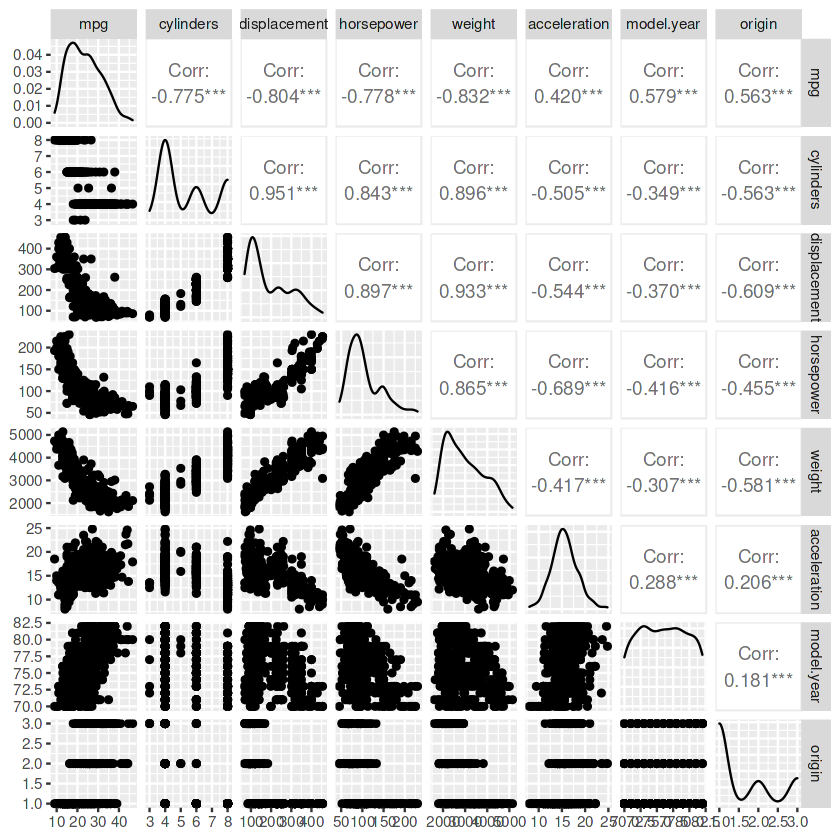

In [5]:
# # import library
library(GGally)
# plot
ggpairs(Auto[,-9])

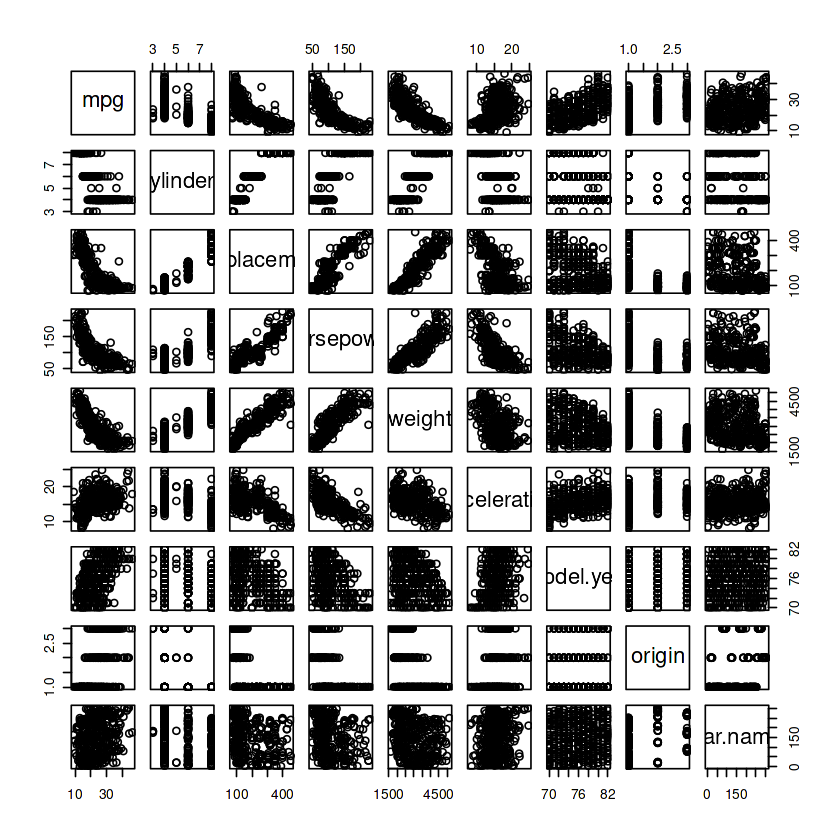

In [6]:
# alternative
pairs(Auto)

**(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.**

In [7]:
# matrix of correlations
cor(Auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
mpg,1.0000000,-0.7753963,-0.8042028,NA,-0.8317409,0.4202889,0.5792671,0.5634504
cylinders,-0.7753963,1.0000000,0.9507214,NA,0.8960168,-0.5054195,-0.3487458,-0.5625433
displacement,-0.8042028,0.9507214,1.0000000,NA,0.9328241,-0.5436841,-0.3701642,-0.6094094
horsepower,NA,NA,NA,1,NA,NA,NA,NA
weight,-0.8317409,0.8960168,0.9328241,NA,1.0000000,-0.4174573,-0.3065643,-0.5810239
acceleration,0.4202889,-0.5054195,-0.5436841,NA,-0.4174573,1.0000000,0.2881370,0.2058730
model.year,0.5792671,-0.3487458,-0.3701642,NA,-0.3065643,0.2881370,1.0000000,0.1806622
origin,0.5634504,-0.5625433,-0.6094094,NA,-0.5810239,0.2058730,0.1806622,1.0000000


**(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.**
1. Is there a relationship between the predictors and the re- sponse?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?

In [9]:
model2 <- lm(mpg ~ . - car.name, data = Auto)

# view the summary
summary(model2)


Call:
lm(formula = mpg ~ . - car.name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
model.year     0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


1. Yes there is a relationship with some 
2. displacement, weight,year and origin
3. high positive relationship, when year increases by 1 unit the mpg increases by 0.75

**d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

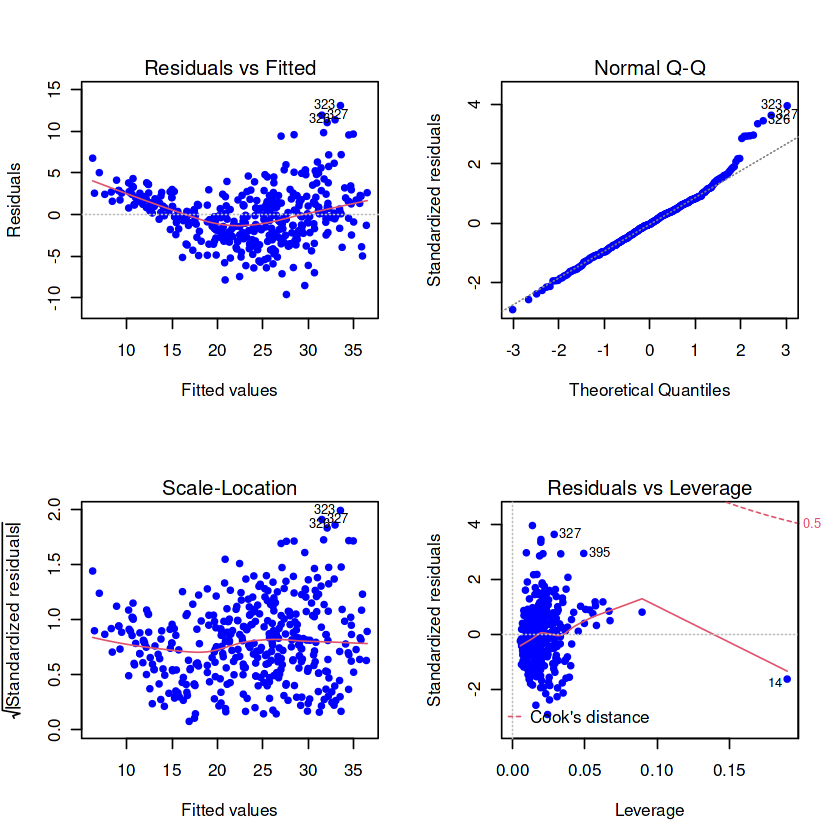

In [11]:
par(mfrow = c(2, 2))
plot(model2,col="blue",pch=20)

**Note:**

The residual plot shows the residuals (prediction errors) of the model plotted against the fitted values. If the plot shows a pattern, it may indicate that the model is not adequately capturing the underlying relationships in the data. **Since the residual plot shows a pattern Homoscedasticity assumption is violated.**

The normal Q-Q plot compares the quantiles of the residuals to the quantiles of a normal distribution. If the residuals are normally distributed, the points on the plot should lie approximately on a straight line.**Thus the data set is normally distributed.**

The scale-location plot shows the residuals plotted against the fitted values, with the square root of the leverage on the x-axis. This plot can help you identify any outliers in the data. **Since no data points can be found beyond-3 and 3, the data set has no outliers.**

The leverage plot shows the influence of each observation on the fit of the model. Observations with high leverage can have a disproportionate influence on the fit of the model.The Cook's distance plot shows the influence of each observation on the fit of the model, with observations with higher influence shown above the dashed red line. T**hus the data set has no high leverage points.**

If you see any problems with the fit of the model or any unusually large outliers or observations with high leverage, you may need to consider adjusting the model or removing these observations from the data. **Which means in further studies we need to adjust the model.**

**(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In [13]:
modeli1 = lm(mpg~.-car.name + horsepower*displacement, data=Auto)
summary(modeli1)


Call:
lm(formula = mpg ~ . - car.name + horsepower * displacement, 
    data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7010 -1.6009 -0.0967  1.4119 12.6734 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -1.894e+00  4.302e+00  -0.440  0.66007    
cylinders                6.466e-01  3.017e-01   2.143  0.03275 *  
displacement            -7.487e-02  1.092e-02  -6.859 2.80e-11 ***
horsepower              -1.975e-01  2.052e-02  -9.624  < 2e-16 ***
weight                  -3.147e-03  6.475e-04  -4.861 1.71e-06 ***
acceleration            -2.131e-01  9.062e-02  -2.351  0.01921 *  
model.year               7.379e-01  4.463e-02  16.534  < 2e-16 ***
origin                   6.891e-01  2.527e-01   2.727  0.00668 ** 
displacement:horsepower  5.236e-04  4.813e-05  10.878  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.912 on 383 degrees of freedom
  (6 obser

Iteraction between displacement:horsepower is statistically significant

In [14]:
modeli2 = lm(mpg~.-car.name + horsepower*origin, data=Auto)
summary(modeli2)



Call:
lm(formula = mpg ~ . - car.name + horsepower * origin, data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-9.277 -1.875 -0.225  1.570 12.080 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.196e+01  4.396e+00  -4.996 8.94e-07 ***
cylinders         -5.275e-01  3.028e-01  -1.742   0.0823 .  
displacement      -1.486e-03  7.607e-03  -0.195   0.8452    
horsepower         8.173e-02  1.856e-02   4.404 1.38e-05 ***
weight            -4.710e-03  6.555e-04  -7.186 3.52e-12 ***
acceleration      -1.124e-01  9.617e-02  -1.168   0.2434    
model.year         7.327e-01  4.780e-02  15.328  < 2e-16 ***
origin             7.695e+00  8.858e-01   8.687  < 2e-16 ***
horsepower:origin -7.955e-02  1.074e-02  -7.405 8.44e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.116 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8438,	Adjusted R-squar

Iteraction between horsepower:origin is statistically significant

In [15]:
modeli3 = lm(mpg~.-car.name + horsepower*weight, data=Auto)
summary(modeli3)



Call:
lm(formula = mpg ~ . - car.name + horsepower * weight, data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-8.589 -1.617 -0.184  1.541 12.001 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.876e+00  4.511e+00   0.638 0.524147    
cylinders         -2.955e-02  2.881e-01  -0.103 0.918363    
displacement       5.950e-03  6.750e-03   0.881 0.378610    
horsepower        -2.313e-01  2.363e-02  -9.791  < 2e-16 ***
weight            -1.121e-02  7.285e-04 -15.393  < 2e-16 ***
acceleration      -9.019e-02  8.855e-02  -1.019 0.309081    
model.year         7.695e-01  4.494e-02  17.124  < 2e-16 ***
origin             8.344e-01  2.513e-01   3.320 0.000986 ***
horsepower:weight  5.529e-05  5.227e-06  10.577  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.931 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8618,	Adjusted R-squar

Iteraction between horsepower:weight is statistically significant

In [16]:
modeli4 = lm(mpg~.-car.name + cylinders*displacement, data=Auto)
summary(modeli4)


Call:
lm(formula = mpg ~ . - car.name + cylinders * displacement, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6081  -1.7833  -0.0465   1.6821  12.2617 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -2.7096590  4.6858582  -0.578 0.563426    
cylinders              -2.6962123  0.4094916  -6.584 1.51e-10 ***
displacement           -0.0774797  0.0141535  -5.474 7.96e-08 ***
horsepower             -0.0476026  0.0133736  -3.559 0.000418 ***
weight                 -0.0052339  0.0006253  -8.370 1.10e-15 ***
acceleration            0.0597997  0.0918038   0.651 0.515188    
model.year              0.7594500  0.0473354  16.044  < 2e-16 ***
origin                  0.7087399  0.2736917   2.590 0.009976 ** 
cylinders:displacement  0.0136081  0.0017209   7.907 2.84e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.089 on 383 degrees of freedom
  (6 observation

Iteraction between cylinders:displacement is statistically significant

In [21]:
modeli5 = lm(mpg~.-car.name + origin*cylinders, data=Auto)
summary(modeli5)


Call:
lm(formula = mpg ~ . - car.name + origin * cylinders, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7908 -2.1679 -0.1234  1.9043 13.0306 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.792e+01  5.169e+00  -3.466 0.000587 ***
cylinders        -3.572e-01  5.459e-01  -0.654 0.513327    
displacement      1.919e-02  7.865e-03   2.439 0.015169 *  
horsepower       -1.656e-02  1.386e-02  -1.195 0.232926    
weight           -6.462e-03  6.541e-04  -9.879  < 2e-16 ***
acceleration      8.068e-02  9.896e-02   0.815 0.415449    
model.year        7.527e-01  5.141e-02  14.640  < 2e-16 ***
origin            1.838e+00  1.358e+00   1.353 0.176836    
cylinders:origin -9.985e-02  3.223e-01  -0.310 0.756898    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8215,	Adjusted R-square

Iteraction between cylinders:origin is not statistically significant

**(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.**

In [23]:
# Squared transformations of the variables
modelt1 <- lm(mpg~.-car.name +I(horsepower^2), data=Auto)
summary(modelt1)


Call:
lm(formula = mpg ~ . - car.name + I(horsepower^2), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5497 -1.7311 -0.2236  1.5877 11.9955 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.3236564  4.6247696   0.286 0.774872    
cylinders        0.3489063  0.3048310   1.145 0.253094    
displacement    -0.0075649  0.0073733  -1.026 0.305550    
horsepower      -0.3194633  0.0343447  -9.302  < 2e-16 ***
weight          -0.0032712  0.0006787  -4.820 2.07e-06 ***
acceleration    -0.3305981  0.0991849  -3.333 0.000942 ***
model.year       0.7353414  0.0459918  15.989  < 2e-16 ***
origin           1.0144130  0.2545545   3.985 8.08e-05 ***
I(horsepower^2)  0.0010060  0.0001065   9.449  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.001 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8552,	Adjusted R-squared:  0.8522 
F

Squared transformation of horsepower does not change the significance

In [25]:
# Log transformations of the variables
modelt2 <- lm(mpg~.-car.name +log(acceleration), data=Auto)
summary(modelt2)


Call:
lm(formula = mpg ~ . - car.name + log(acceleration), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7931 -2.0052 -0.1279  1.9299 13.1085 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.552e+01  1.479e+01   3.077  0.00224 ** 
cylinders         -2.796e-01  3.193e-01  -0.876  0.38172    
displacement       8.042e-03  7.805e-03   1.030  0.30344    
horsepower        -3.434e-02  1.401e-02  -2.450  0.01473 *  
weight            -5.343e-03  6.854e-04  -7.795 6.15e-14 ***
acceleration       2.167e+00  4.782e-01   4.532 7.82e-06 ***
model.year         7.560e-01  4.978e-02  15.186  < 2e-16 ***
origin             1.329e+00  2.724e-01   4.877 1.58e-06 ***
log(acceleration) -3.513e+01  7.886e+00  -4.455 1.10e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.249 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8303,	Adjusted

Log transformation of acceleration is less significant than acceleration

In [26]:
# Root transformations of the variables
modelt3 <- lm(mpg~.-car.name +I(cylinders^0.5), data=Auto)
summary(modelt3)


Call:
lm(formula = mpg ~ . - car.name + I(cylinders^0.5), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7190  -2.1361  -0.1756   1.7299  12.9229 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.281e+01  1.453e+01   2.258 0.024490 *  
cylinders         8.550e+00  2.513e+00   3.402 0.000739 ***
displacement      2.001e-02  7.399e-03   2.704 0.007149 ** 
horsepower       -2.867e-02  1.395e-02  -2.055 0.040585 *  
weight           -6.365e-03  6.427e-04  -9.905  < 2e-16 ***
acceleration      1.062e-01  9.757e-02   1.088 0.277224    
model.year        7.474e-01  5.019e-02  14.891  < 2e-16 ***
origin            1.255e+00  2.779e-01   4.514 8.46e-06 ***
I(cylinders^0.5) -4.261e+01  1.175e+01  -3.628 0.000325 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.276 on 383 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.8274,	Adjusted 

Sqaure root tramfromation of cylinders is more significant than the cylinders